In [2]:
%%bash
pip install ucimlrepo

-bash: line 1: pip: command not found


CalledProcessError: Command 'b'pip install ucimlrepo\n'' returned non-zero exit status 127.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Constants
_RANDOM_STATE = 42

In [ ]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [ ]:
# Display basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


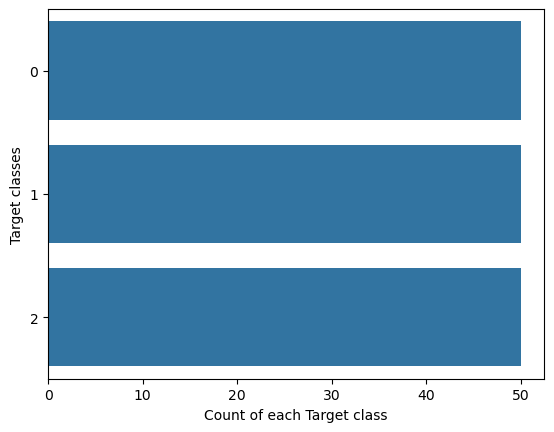

In [ ]:
# plot the count of each value in df
sns.countplot(y=df.Target ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

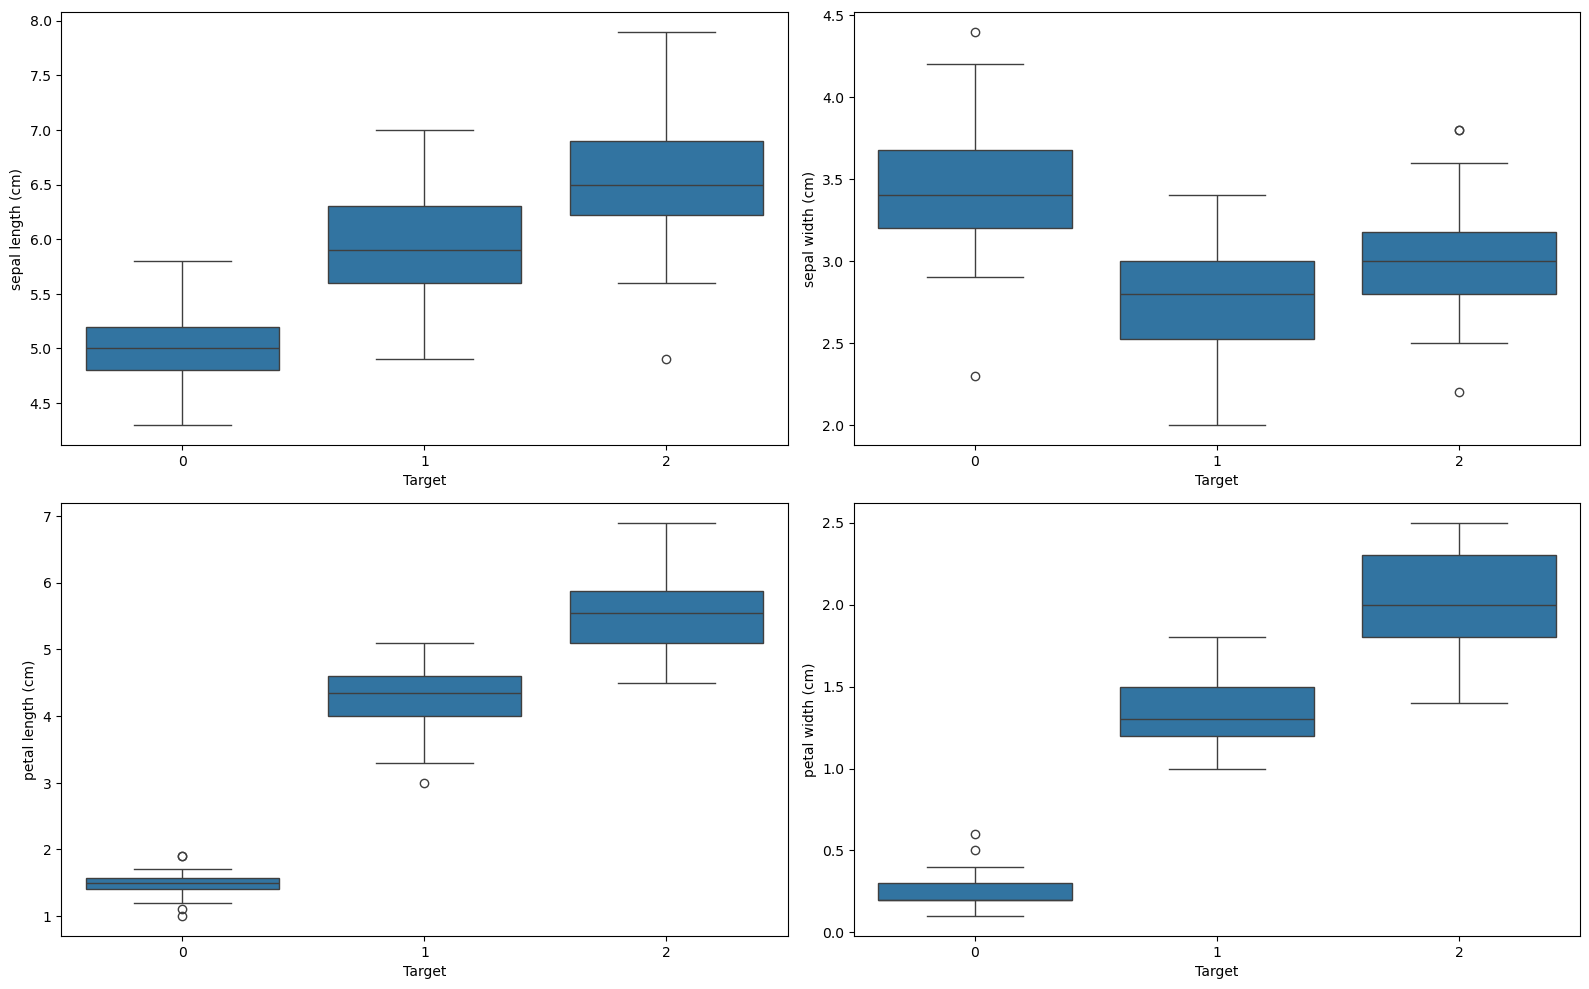

In [ ]:
# plot a box plot for each column (Y-axis) - target (X-axis)
# you can choose to create 4 subplots or have four separate plots
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Target'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
#plt.title("Individual Features by Class")
plt.show()

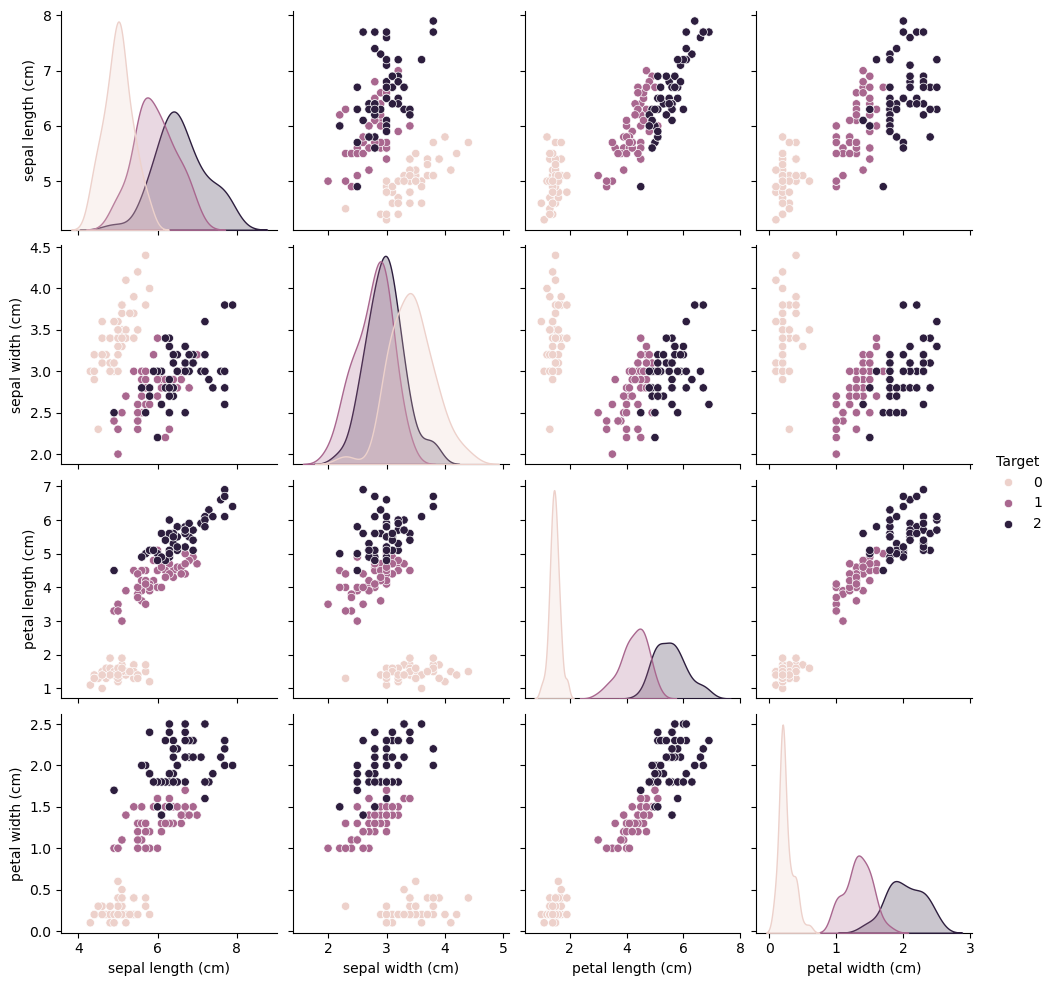

In [ ]:
# create a pair plot and define the color as the target
p=sns.pairplot(df, hue = 'Target')

In [ ]:
# scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

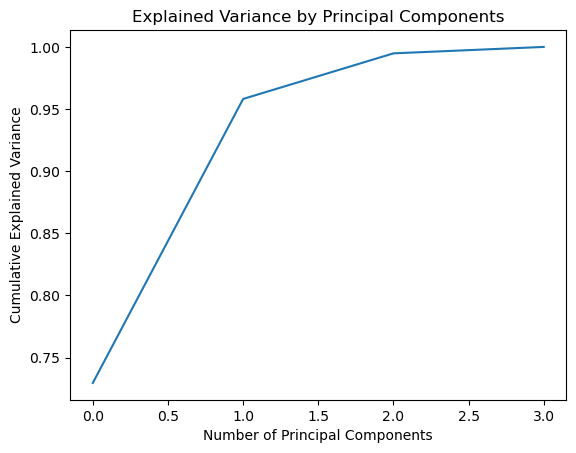

In [ ]:
# Instantiate the PCA model
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [ ]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


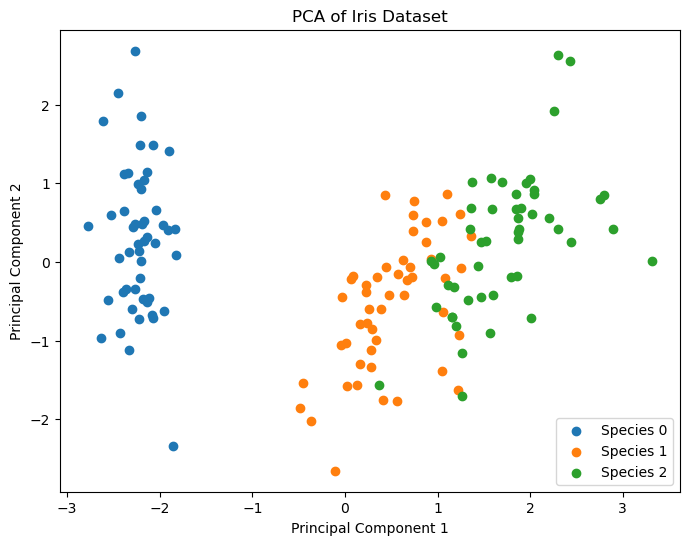

In [ ]:
# Add the target column to the PCA DataFrame
pca_df['Target'] = target

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for species in range(3):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == species, 'PC1'],
        pca_df.loc[pca_df['Target'] == species, 'PC2'],
        label=f'Species {species}'
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df['Target'].values, test_size = 0.3, random_state=20, stratify=pca_df['Target'].values)

In [ ]:
X_train

,PC1,PC2,PC3,PC4
42,-2.553638,-0.479101,0.305766,0.066601
16,-2.207588,1.483609,-0.005344,-0.188817
49,-2.203833,0.009216,-0.153029,-0.049372
94,0.288586,-0.855730,0.130890,0.107402
41,-1.858122,-2.337415,-0.204234,-0.289864
...,...,...,...,...
99,0.256731,-0.598852,0.091879,0.058622
30,-2.140122,-0.504541,-0.075008,0.048189
2,-2.364229,-0.341908,0.044201,-0.028377
130,2.435954,0.259284,-0.727816,0.017923


Optimal k: 3


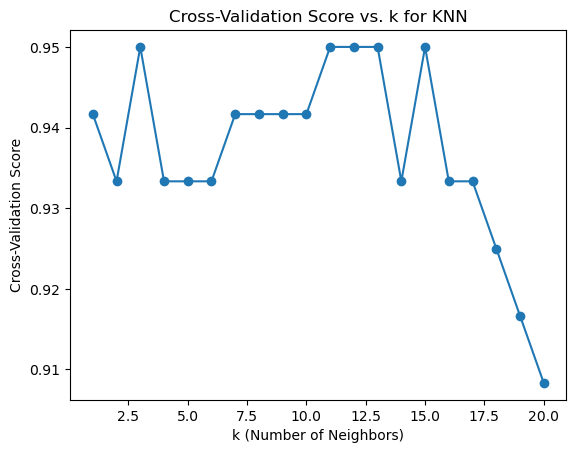

Test Accuracy with k=3: 1.0


In [ ]:
# Extract features and target
X = pca_df.drop('Target', axis=1)
y = pca_df['Target']

# Split the data into training and testing sets
X_train_given, X_test, y_train_given, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to try
k_values = list(range(1, 21))

# Create an empty list to store cross-validation scores for each k
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    # Create a pipeline with PCA and KNN
    model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    scores = cross_val_score(model, X_train_given, y_train_given, cv=5)  # You can adjust the number of folds (cv) as needed

    # Average cross-validation scores for this k
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. k for KNN')
plt.show()

# Train the final model with the optimal k using the entire training set
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f'Test Accuracy with k={optimal_k}: {test_accuracy}')


# Your Turn

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets['class']


# EDA

In [ ]:
X.shape

(366, 34)

In [ ]:
# TODO: Let's see the head of X
X.head()



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [ ]:
y.head()

0    2
1    1
2    3
3    1
4    3
Name: class, dtype: int64

In [ ]:
# Do any of the columns have missing values?
X.isnull().sum()


erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [ ]:
# TODO: Any missing values in target vector, y?
y.isnull().sum()


0

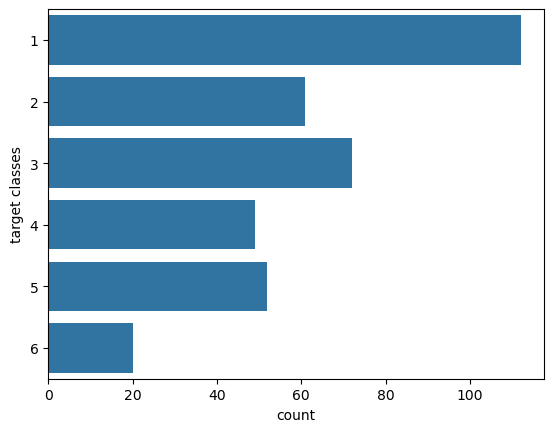

In [ ]:
# Visualize distribution of target labels using a count plot
sns.countplot(y = y, data = X)
plt.xlabel("count")
plt.ylabel("target classes")
plt.show()


In [ ]:
# TODO: Reflection: Is this a balanced dataset?
# nope 1 has way to many compared to 6

# Preprocessing

In [ ]:
# TODO: Split data into train, test with 20% holdout
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
# Copy X_train to a new var X_eda
X_eda = X_train.copy(deep=True)

In [ ]:
# TODO: instantiate a SimpleImputer and fit_transform X_eda
# NOTE: Use set_output API to maintain dataframe type
# TODO: print out X_eda.isna().any().any()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

# Fit and transform X_eda
X_eda_imputed = imputer.fit_transform(X_eda)

X_eda_imputed_df = pd.DataFrame(X_eda_imputed, columns=X_eda.columns)

# Check if there are any missing values in the imputed array
print(X_eda_imputed_df.isna().any().any())



False


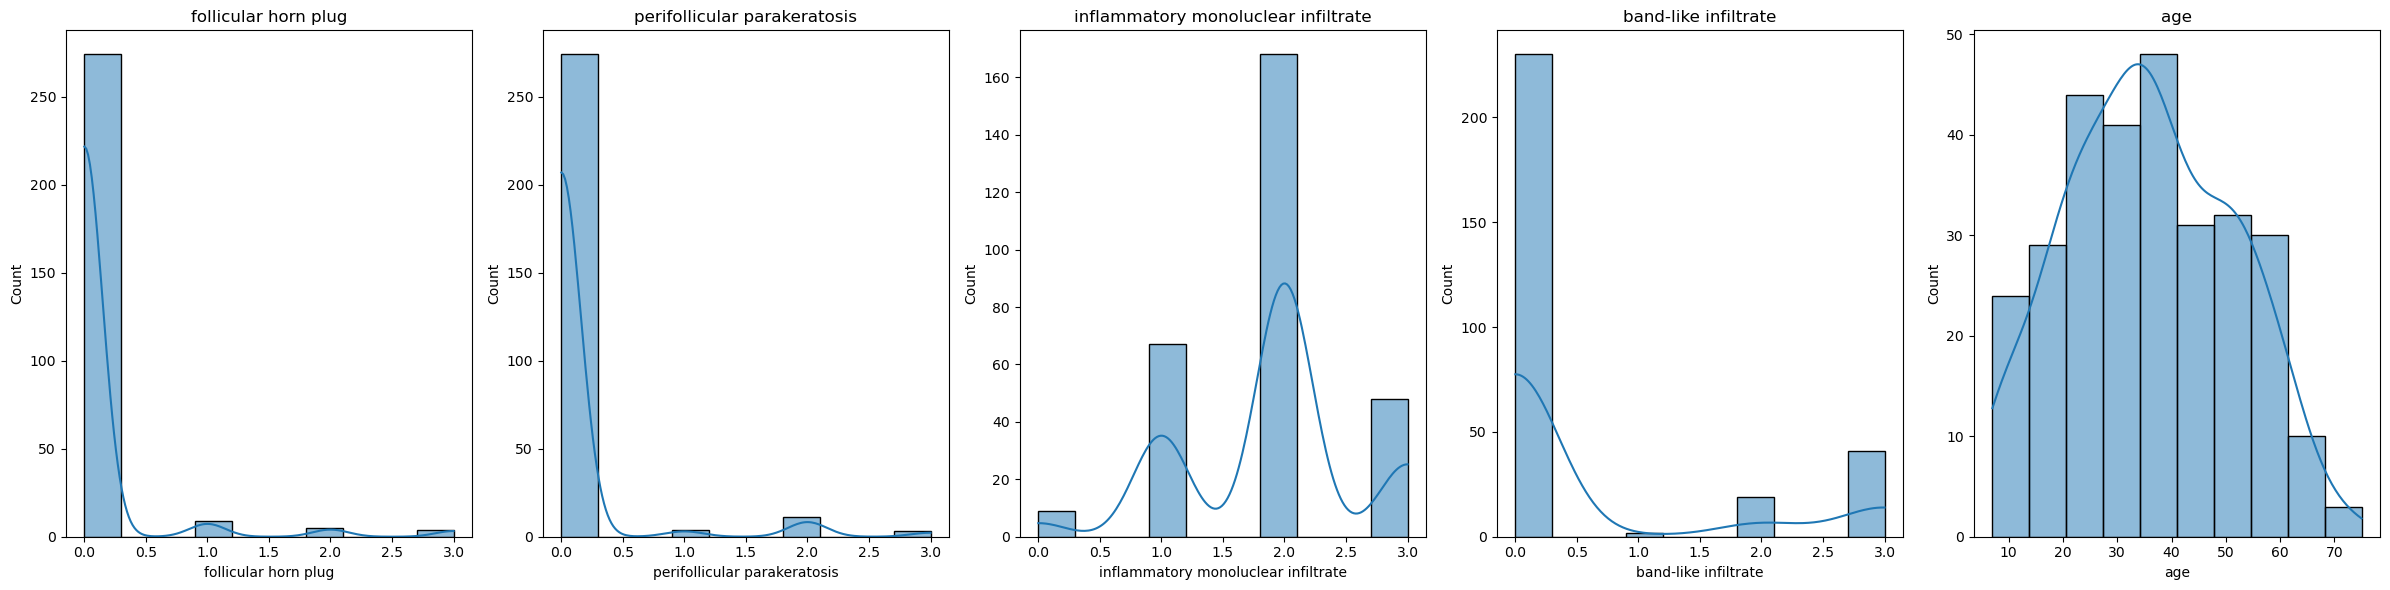

In [ ]:
# TODO: For last 5 features, plot a histplot to visualize feature distribution

def plot_last_5_features(X: pd.DataFrame) -> None:
    """Plots subplot histograms of last five features of X on a single figure

    Args:
        X (pd.DataFrame): Dataframe to plot
    """
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24,6))
    # TODO: You complete the function
    for i, col in enumerate(X.columns[-5:]):
            sns.histplot(X[col], ax=axes[i], kde=True)
            axes[i].set_title(col)
        
    plt.tight_layout()
    plt.show()


plot_last_5_features(X_eda_imputed_df)

In [ ]:
# TODO: Scale all features in X_eda using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_eda = scaler.fit_transform(X_eda_imputed_df)
scaled_X_eda_df = pd.DataFrame(scaled_X_eda, columns=X_eda.columns)


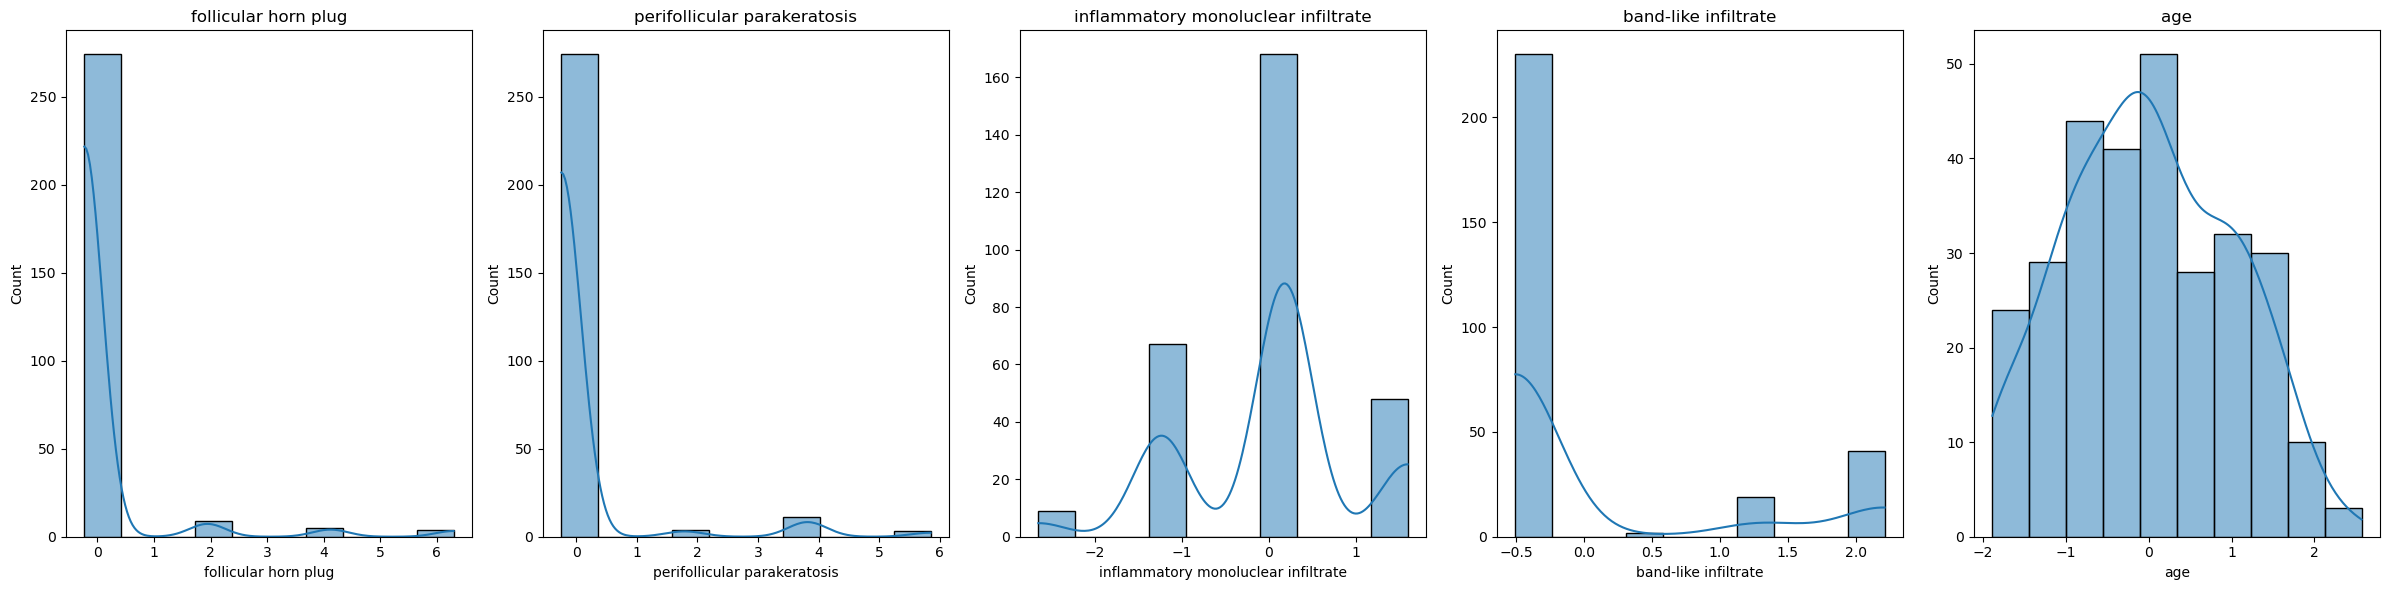

In [ ]:
# TODO: Call above histogram function again to see what happened to our vars:
plot_last_5_features(scaled_X_eda_df)


In [ ]:
print("Number of features before PCA:", scaled_X_eda_df.shape[1])

Number of features before PCA: 34


# Dimensionality Reduction

In [ ]:
# Let's reduce the dimensionality of our dataset! 
# TODO: Instantiate a PCA with the number of components required to explain 90% of the variance in the X_eda
# NOTE: Use set_output API to ensure X_eda is returned as dataframe instead of np.array
# TODO: Call fit_transform on X_eda and 

pca = PCA(n_components=0.9)

derm_pca_result = pca.fit_transform(scaled_X_eda_df)

derm_pca_result_df = pd.DataFrame(derm_pca_result, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
print("Number of features after PCA:", derm_pca_result_df.shape[1])



Number of features after PCA: 17


In [ ]:
# TODO: Reflect: How many features do we now have? Did we reduce the dimensionality of the dataset?

# We have reduced the number of features from 34 to 17, resulting in a significant reduction

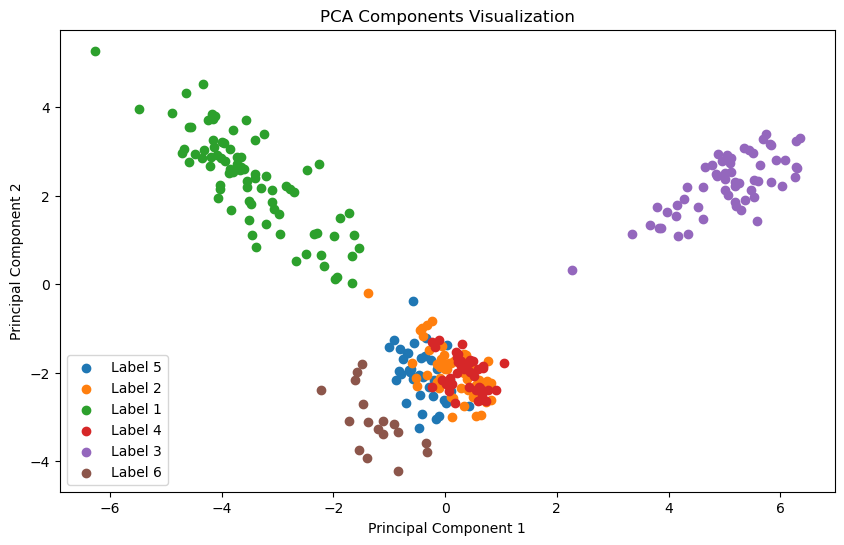

In [ ]:
# TODO: Visualize first two PCA components of X_eda on a scatter plot independently for each unique label found in y_train

# Perform PCA on X_eda to reduce its dimensionality to two components
pca_plot = PCA(n_components=2)
pca_components = pca_plot.fit_transform(derm_pca_result_df)

# Combine PCA components with the target labels from y_train into a DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Label'] = y_train.values

# Plot a scatter plot for each unique label
plt.figure(figsize=(10, 6))
for label in pca_df['Label'].unique():
    label_data = pca_df[pca_df['Label'] == label]
    plt.scatter(label_data['PC1'], label_data['PC2'], label=f'Label {label}')

plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Modelling

In [ ]:
# Instantiate a random forest classifier with default values other than random_state set to _RANDOM_STATE
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=_RANDOM_STATE)

In [ ]:
# Create a pipeline with our SimpleImputer, StandardScaler, PCA, and rf
from sklearn.pipeline import make_pipeline


si = SimpleImputer()
ss = StandardScaler()
pca = PCA(n_components=0.9)
steps = [si, ss, pca, rf]
pipe = make_pipeline(*steps)

Optimal number of components: 1


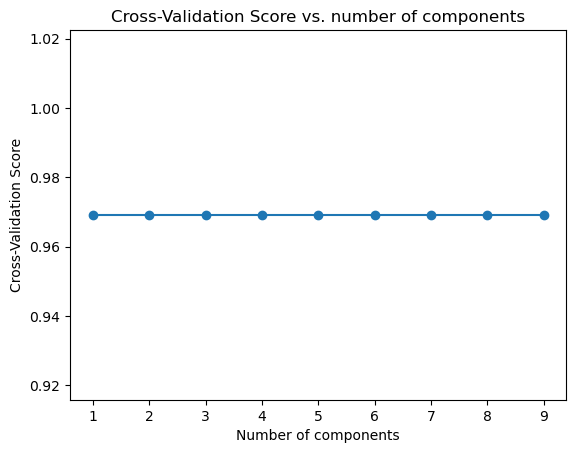

In [ ]:
# TODO: Let's test our pipeline using different numbers of principal components similar to above
# NOTE: Recall that you can slice dataframes as follow: df.iloc[:, :i] will select all rows and all columns up to column number i

# Define a range of pca components to try
components = list(range(1, 10))
cv_scores = []

# Perform k-fold cross-validation for each number of components
for c in components:
    # Perform cross-validation
    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    # Average cross-validation scores for this number of components
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest cross-validation score
optimal_comp = components[np.argmax(cv_scores)]

print(f'Optimal number of components: {optimal_comp}')


# Plot the cross-validation scores for different k values
plt.plot(components, cv_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. number of components')
plt.show()


In [ ]:
# Train the final model with the optimal number of components using the entire training set
pipe.fit(X_train.iloc[:, :optimal_comp], y_train)

# TODO: Evaluate the model on the test set
test_accuracy = pipe.score(X_test.iloc[:, :optimal_comp], y_test)


print(f'Test Accuracy with number of components == {optimal_comp}: {test_accuracy}')

Test Accuracy with num comps == 1: 0.4594594594594595
